In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

In [2]:
def load_images_from_folder(folder_path):
    images = []
    for file_name in os.listdir(folder_path):
        image = cv2.imread(os.path.join(folder_path, file_name), cv2.IMREAD_GRAYSCALE)
        if image is not None:
            images.append(image)
    return images

In [3]:
# Load the data using the function
suprise_images_path = 'Data/images/surprise'
happy_images_path = 'Data/images/happy'
neutral_images_path = 'Data/images/neutral'
disgust_images_path = 'Data/images/disgust'

neutral_images = load_images_from_folder(neutral_images_path)
happy_images = load_images_from_folder(happy_images_path)
superise_images = load_images_from_folder(suprise_images_path)
disgust_images = load_images_from_folder(disgust_images_path)

In [4]:
Image_shape = superise_images[0].shape
print('Image shape:', Image_shape)

Image shape: (600, 300)


In [5]:
# Select 50 images from each class as training data randomly
np.random.shuffle(neutral_images)
np.random.shuffle(happy_images)
np.random.shuffle(superise_images)
np.random.shuffle(disgust_images)

print('Number of neutral images:', len(neutral_images))
print('Number of happy images:', len(happy_images))
print('Number of superise images:', len(superise_images))
print('Number of disgust images:', len(disgust_images))


train_neutral_images = neutral_images[:120]
train_happy_images = happy_images[:60]
train_superise_images = superise_images[:60]
train_disgust_images = disgust_images[:30]


test_neutral_images = neutral_images[120:]
test_happy_images = happy_images[60:]
test_superise_images = superise_images[60:]
test_disgust_images = disgust_images[30:]

Number of neutral images: 190
Number of happy images: 85
Number of superise images: 88
Number of disgust images: 47


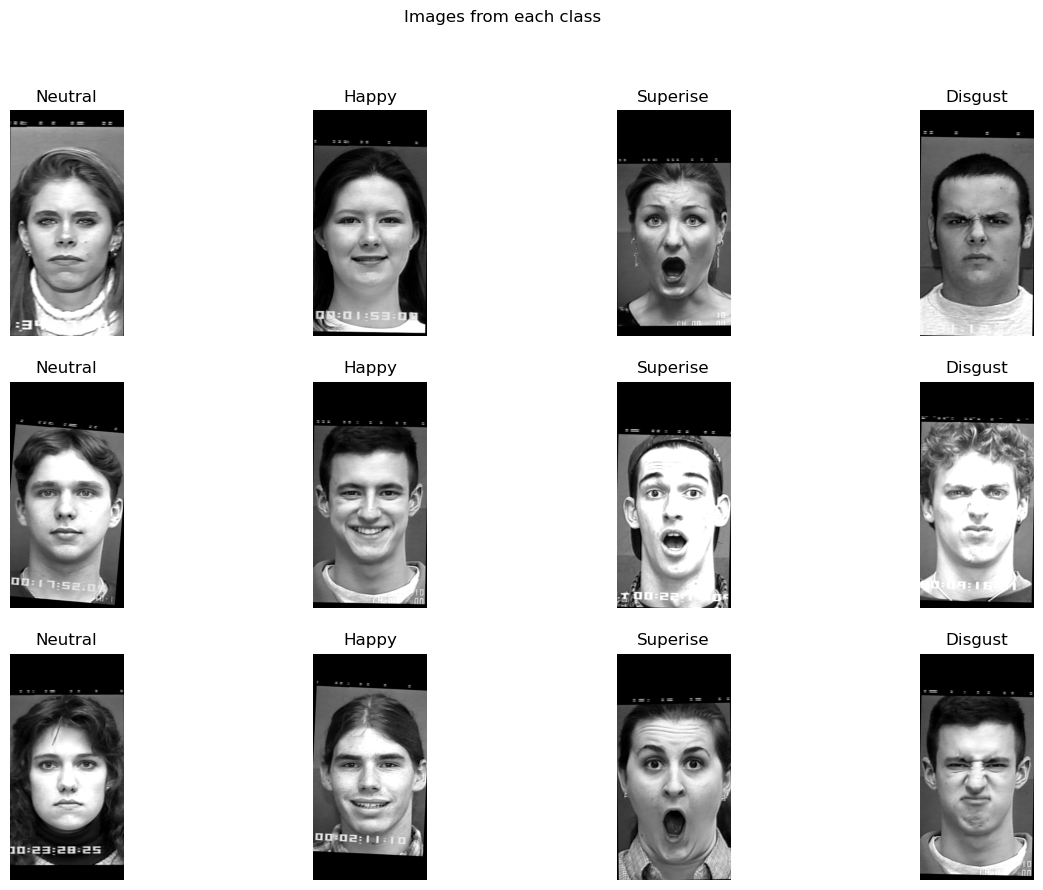

In [6]:
# Plot 3 images from each class
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Images from each class')
for i in range(3):
    axs[i, 0].imshow(train_neutral_images[i], cmap='gray')
    axs[i, 0].set_title('Neutral')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(train_happy_images[i], cmap='gray')
    axs[i, 1].set_title('Happy')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(train_superise_images[i], cmap='gray')
    axs[i, 2].set_title('Superise')
    axs[i, 2].axis('off')

    axs[i, 3].imshow(train_disgust_images[i], cmap='gray')
    axs[i, 3].set_title('Disgust')
    axs[i, 3].axis('off')
    

In [7]:
# Train PCA on the training data
train_neutral_images = np.array(train_neutral_images)
train_disgust_images = np.array(train_disgust_images)
train_superise_images = np.array(train_superise_images)
train_happy_images = np.array(train_happy_images)

train_superise_images = train_superise_images.reshape(train_superise_images.shape[0], -1)
train_happy_images = train_happy_images.reshape(train_happy_images.shape[0], -1)
train_neutral_images = train_neutral_images.reshape(train_neutral_images.shape[0], -1)
train_disgust_images = train_disgust_images.reshape(train_disgust_images.shape[0], -1)

test_happy_images = np.array(test_happy_images)
test_superise_images = np.array(test_superise_images)
test_neutral_images = np.array(test_neutral_images)
test_disgust_images = np.array(test_disgust_images)

test_happy_images = test_happy_images.reshape(test_happy_images.shape[0], -1)
test_superise_images = test_superise_images.reshape(test_superise_images.shape[0], -1)
test_disgust_images = test_disgust_images.reshape(test_disgust_images.shape[0], -1)
test_neutral_images = test_neutral_images.reshape(test_neutral_images.shape[0], -1)

# Concatenate the two classes
train_data = np.concatenate((train_neutral_images, train_happy_images, train_superise_images, train_disgust_images), axis=0)
test_data = np.concatenate((test_neutral_images, test_happy_images, test_superise_images, test_disgust_images), axis=0)

pca = PCA(n_components=100)
pca.fit(train_data)

PCA(n_components=100)

In [8]:
def project_reconstruct_images(images, pca):
    images = np.array(images)
    images = images.reshape(images.shape[0], -1)
    projected_images = pca.transform(images)
    reconstructed_images = pca.inverse_transform(projected_images)
    return reconstructed_images 

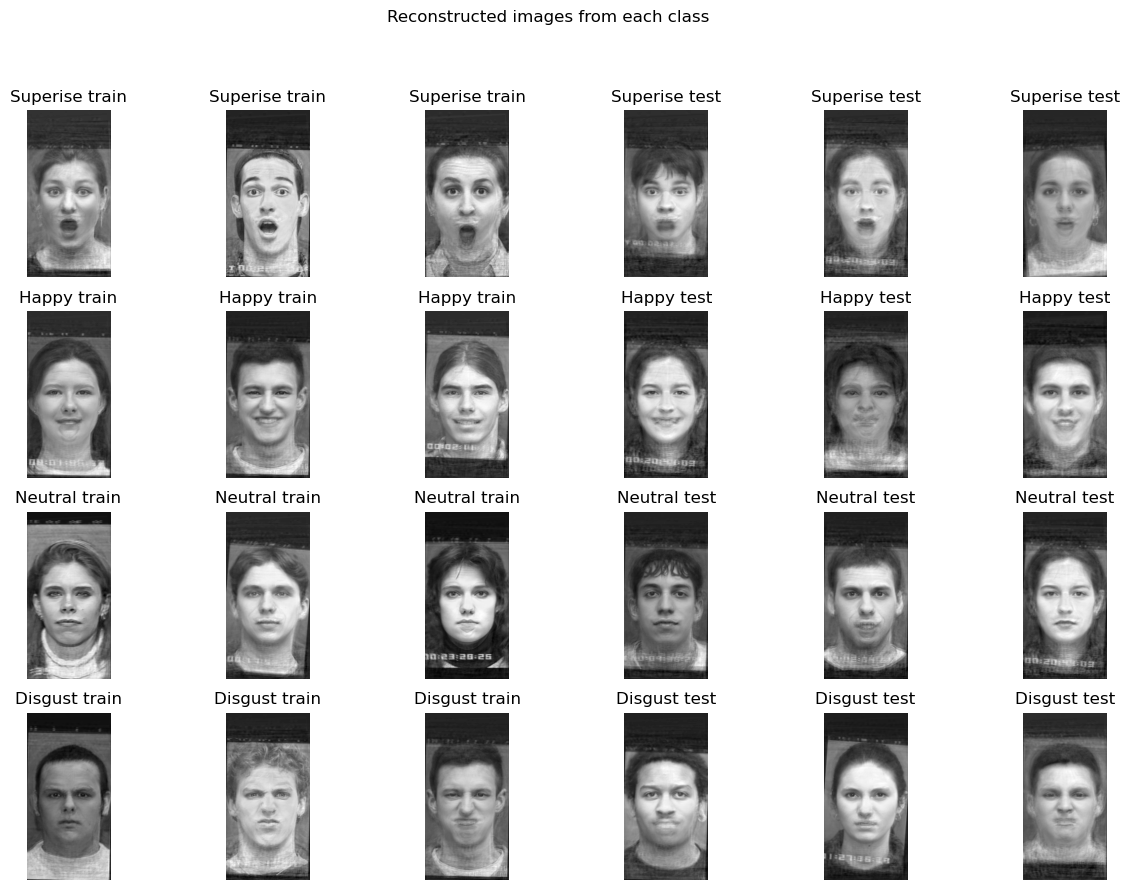

In [9]:
# Some images from train and test data
train_superise_reconstructed = project_reconstruct_images(train_superise_images, pca)
train_happy_reconstructed = project_reconstruct_images(train_happy_images, pca)
train_neutral_reconstructed = project_reconstruct_images(train_neutral_images, pca)
train_disgust_reconstructed = project_reconstruct_images(train_disgust_images, pca)

test_superise_reconstructed = project_reconstruct_images(test_superise_images, pca)
test_happy_reconstructed = project_reconstruct_images(test_happy_images, pca)
test_neutral_reconstructed = project_reconstruct_images(test_neutral_images, pca)
test_disgust_reconstructed = project_reconstruct_images(test_disgust_images, pca)

# Plot 3 images from each class
fig, axs = plt.subplots(4, 6, figsize=(15, 10))
fig.suptitle('Reconstructed images from each class')
for i in range(3):
    axs[0, i].imshow(train_superise_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[0, i].set_title('Superise train')
    axs[0, i].axis('off')
    axs[0, i+3].imshow(test_superise_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[0, i+3].set_title('Superise test')
    axs[0, i+3].axis('off')

    axs[1, i].imshow(train_happy_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[1, i].set_title('Happy train')
    axs[1, i].axis('off')
    axs[1, i+3].imshow(test_happy_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[1, i+3].set_title('Happy test')
    axs[1, i+3].axis('off')

    axs[2, i].imshow(train_neutral_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[2, i].set_title('Neutral train')
    axs[2, i].axis('off')
    axs[2, i+3].imshow(test_neutral_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[2, i+3].set_title('Neutral test')
    axs[2, i+3].axis('off')

    axs[3, i].imshow(train_disgust_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[3, i].set_title('Disgust train')
    axs[3, i].axis('off')
    axs[3, i+3].imshow(test_disgust_reconstructed[i].reshape(Image_shape), cmap='gray')
    axs[3, i+3].set_title('Disgust test')
    axs[3, i+3].axis('off')
plt.show()




In [10]:
# Labels: 0 - neutral, 1 - happy, 2 - surprise, 3 - disgust
train_labels = np.concatenate((np.zeros(120), np.ones(60), np.ones(60)*2, np.ones(30)*3), axis=0)
print('Train labels:', train_labels)

test_labels = np.concatenate((np.zeros(len(test_neutral_images)), np.ones(len(test_happy_images)), np.ones(len(test_superise_images))*2, np.ones(len(test_disgust_images))*3), axis=0)
print('Test labels:', test_labels)

Train labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]
Test labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

In [11]:
# Shuffle the data
np.random.seed(42)
shuffle_index = np.random.permutation(len(train_labels))
train_data_shuffled = train_data[shuffle_index]
train_labels_shuffled = train_labels[shuffle_index]

# Print 10 first labels
print('Train labels:', train_labels_shuffled[:10])

Train labels: [0. 0. 0. 1. 2. 1. 2. 0. 1. 3.]


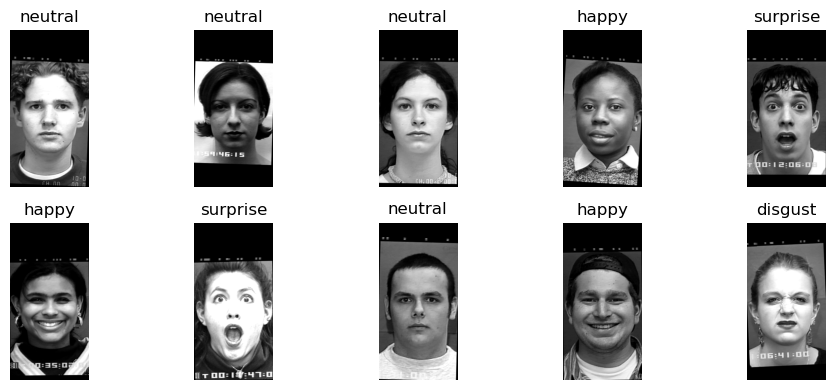

In [12]:
emotion_mapping = {0: 'neutral', 1: 'happy', 2: 'surprise', 3: 'disgust'}

# Plot 10 images and their labels
plt.figure(figsize=(10, 4))
for i in range(10):
    image, label = train_data_shuffled[i].reshape(Image_shape), train_labels_shuffled[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(emotion_mapping[label])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
def cross_validation(X, y, C_values, k=5):
    fold_size = len(X) // k
    best_C = None
    best_score = 0
    iteration = 1
    average_scores = []

    for C in C_values:
        scores = []
        for i in range(k):
            X_train = np.concatenate((X[:i*fold_size], X[(i+1)*fold_size:]), axis=0)
            y_train = np.concatenate((y[:i*fold_size], y[(i+1)*fold_size:]), axis=0)
            X_val = X[i*fold_size:(i+1)*fold_size]
            y_val = y[i*fold_size:(i+1)*fold_size]

            model = SVC(C=C, kernel='linear')
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            scores.append(accuracy_score(y_val, y_pred))

        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_C = C
            print('Iteration:', iteration, 'C:', C, 'Score:', avg_score)
        iteration += 1
        average_scores.append(avg_score)
    return best_C, best_score, average_scores


In [14]:
# C values to try: 10^-10, 10^-6 with step size 2
C_values = [1e-8 * (1+2 * i) for i in range(100)]
print('C values min:', min(C_values), 'C values max:', max(C_values))
# Get PCA transformed data
train_data_pca = pca.transform(train_data_shuffled)
print('Train data shape:', train_data_pca.shape)
best_C, best_score, average_scores = cross_validation(train_data_pca, train_labels_shuffled, C_values)
print(f'Best C: {best_C}, Best Score: {best_score}')

final_model = SVC(C=best_C, kernel='linear')
final_model.fit(train_data, train_labels)

C values min: 1e-08 C values max: 1.99e-06
Train data shape: (270, 100)
Iteration: 1 C: 1e-08 Score: 0.8518518518518519
Iteration: 2 C: 3.0000000000000004e-08 Score: 0.8666666666666666
Iteration: 4 C: 7e-08 Score: 0.8703703703703705
Iteration: 6 C: 1.1e-07 Score: 0.874074074074074
Iteration: 11 C: 2.1e-07 Score: 0.8777777777777779
Best C: 2.1e-07, Best Score: 0.8777777777777779


SVC(C=2.1e-07, kernel='linear')

Text(0.5, 1.0, 'Average score vs C')

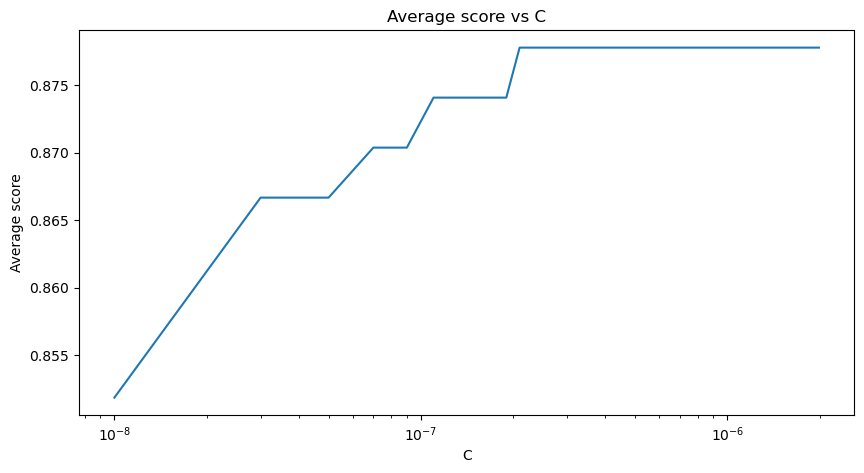

In [15]:
# Plot average_scores vs C_values
plt.figure(figsize=(10, 5))
plt.plot(C_values, average_scores)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Average score')
plt.title('Average score vs C')


In [16]:
# Test the model
test_data_pca = pca.transform(test_data)
test_predictions = final_model.predict(test_data)
test_accuracy = accuracy_score(test_labels, test_predictions)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.8642857142857143


In [17]:
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.8752664925323154
Recall: 0.8642857142857143


In [18]:
# Test on every C value
def test_cross_validation(X_train, y_train, C_values, k=5):
    scores = []

    for C in C_values:
        model = SVC(C=C, kernel='linear')
        model.fit(X_train, y_train)
        test_predictions = model.predict(test_data_pca)
        score = accuracy_score(test_labels, test_predictions)
        scores.append(score)
    return scores

test_scores = test_cross_validation(train_data_pca, train_labels_shuffled, C_values)

Text(0.5, 1.0, 'Test score vs C')

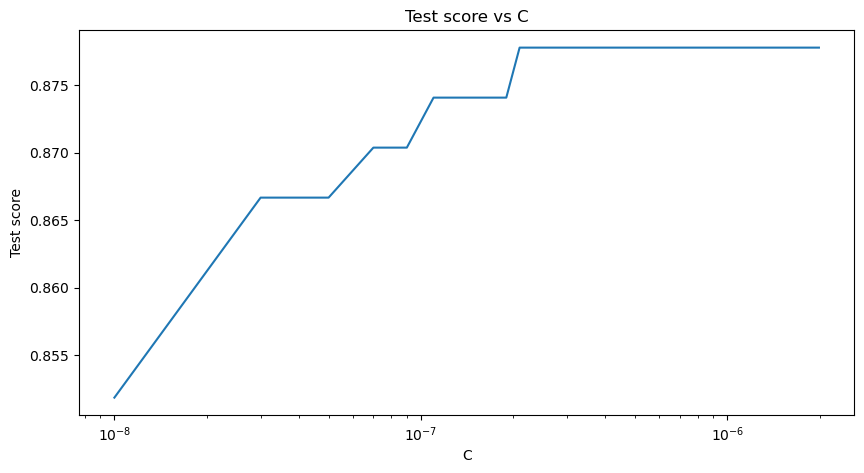

In [19]:
# Plot average_scores vs C_values
plt.figure(figsize=(10, 5))
plt.plot(C_values, average_scores)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Test score')
plt.title('Test score vs C')


In [20]:
print('Test predictions:', test_predictions)
print('Test labels:', test_labels)

Test predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 0. 0. 0. 2. 2. 2. 2.
 2. 2. 2. 0. 3. 3. 3. 3. 1. 0. 0. 0. 1. 3. 3. 3. 3. 0. 0. 3.]
Test labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


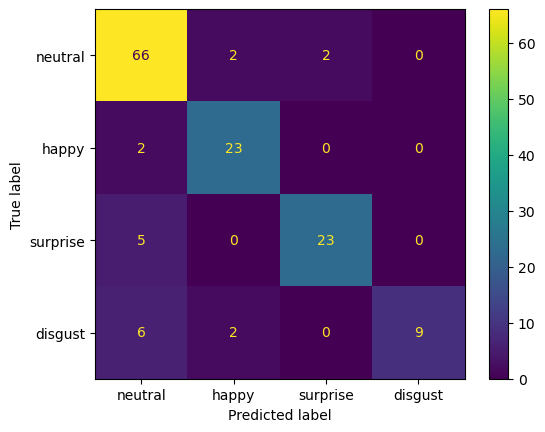

In [21]:
# Plot Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_labels, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_mapping.values())
disp.plot()
plt.show()


In [22]:
C_values = [10**i for i in range(-15, 15)]
gamma_values = [10**i for i in range(-15, 15)]
def train_rbf_svm_with_grid_search(X_train, y_train):
    # Define the parameter grid
    param_grid = {
        'C': C_values,
        'gamma': gamma_values,
        'kernel': ['rbf']
    }
    # rbf kernel
    svm_model = SVC(kernel='rbf')
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_score_, grid_search.best_params_

# Train the model
final_model, best_score, best_params = train_rbf_svm_with_grid_search(train_data_pca, train_labels_shuffled)
print('Best score:', best_score)

Best score: 0.874074074074074


In [23]:
print('Best params:', best_params)

Best params: {'C': 1000, 'gamma': 1e-10, 'kernel': 'rbf'}


In [24]:
# Test the model
test_data_pca = pca.transform(test_data)
test_pred = final_model.predict(test_data_pca)
test_accuracy = accuracy_score(test_labels, test_pred)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.8714285714285714


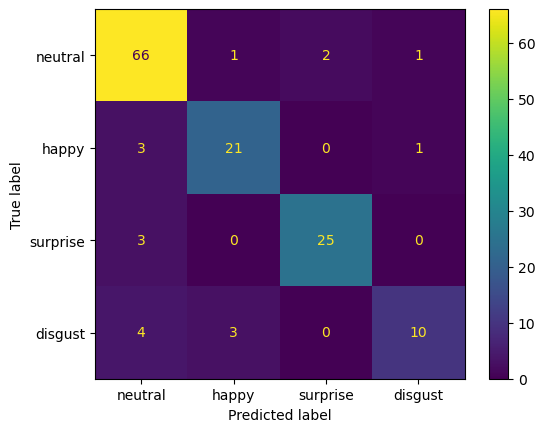

In [25]:
cm = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_mapping.values())
disp.plot()
plt.show()

The linear and RBF kernel SVM models have these properties:

### Linear SVM
- Suitable for linearly separable data.
- May generalize better to unseen data.

### RBF Kernel SVM
- Captures non-linear relationships.
- Performed better on training data but worse on test data, indicating overfitting.

In our example, the RBF kernel SVM model overfits the data, making it doing better on training data but worse on test data. This makes sense because the RBF kernel SVM model is more complex than the linear SVM model, and it is more likely to overfit the data.